# NASA Benchmark SuperCritical Wing (BSCW)

This notebook processes the forces output from simulating BSCW Test Case 3 (M=0.85, $\alpha=5^\circ$).

In [1]:
## Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## Steady case

First a steady state solution is run to obtain a base flow for the unsteady and harmonic balance simulations.

In [2]:
sdf = pd.read_csv('Steady/history.csv').rename(columns=lambda x: x.strip())
sdf

,"""Cur_Time""","""Time_Step""","""CD""","""CL""","""CSF""","""CMx""","""CMy""","""CMz""","""CFx""","""CFy""","""CFz""","""CEff"""
0,0,0,0.068667,0.101907,0.000004,0.107399,-0.058127,-0.059524,0.059524,0.000004,0.107504,1.484075
1,0,0,0.128828,0.188411,0.000008,0.198696,-0.107442,-0.111887,0.111917,0.000008,0.198922,1.462495
2,0,0,0.181352,0.259773,0.000011,0.274245,-0.147891,-0.157968,0.158021,0.000011,0.274591,1.432427
3,0,0,0.226886,0.316526,0.000014,0.334640,-0.179707,-0.198370,0.198436,0.000014,0.335096,1.395087
4,0,0,0.265737,0.359577,0.000016,0.380818,-0.203443,-0.233320,0.233387,0.000016,0.381370,1.353132
...,...,...,...,...,...,...,...,...,...,...,...,...
221497,0,0,0.084576,0.486782,0.000077,0.472505,-0.209092,-0.040997,0.041828,0.000077,0.492301,5.755544
221498,0,0,0.084624,0.486911,0.000077,0.472482,-0.209230,-0.041021,0.041865,0.000077,0.492433,5.753802
221499,0,0,0.084672,0.487039,0.000077,0.472457,-0.209366,-0.041044,0.041902,0.000077,0.492565,5.752057
221500,0,0,0.084720,0.487166,0.000077,0.472430,-0.209502,-0.041066,0.041938,0.000077,0.492696,5.750312


### Plot data for steady-state

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(62.597222222222214, 0.5, '$C_L$')

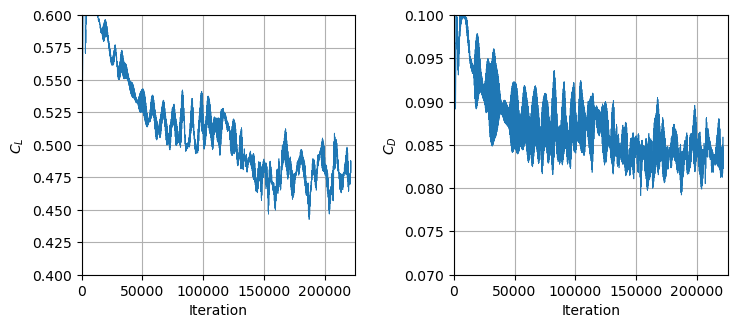

In [3]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,4)
fig.tight_layout(pad=4.0)

ax[0].plot(sdf.index,sdf['"CL"'],linewidth=0.5)
ax[1].plot(sdf.index,sdf['"CD"'],linewidth=0.5)

ax[1].grid()
ax[0].grid()
ax[0].set_ylim([0.4,0.6])
ax[0].set_xlim([0,225000])
ax[1].set_xlim([0,225000])
ax[1].set_ylim([0.07,0.1])

ax[0].set_xlabel('Iteration')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('$C_D$')
ax[0].set_ylabel('$C_L$')

### Mean aerodynamic coefficients

From the above plots, clearly the solution is not that steady, and so instead of taking a point value, quasi-steady values for lift and drag are averaged to compare with the literature.

In [4]:
sdf['"CL"'][150000:].mean()

0.4782915508442589

In [5]:
sdf['"CD"'][150000:].mean()

0.08403433107397751

## Unsteady case

In [6]:
udf = pd.read_csv('Unsteady/history_v1.csv').rename(columns=lambda x: x.strip())
udf

,"""Cur_Time""","""Time_Step""","""CD""","""CL""","""CSF""","""CMx""","""CMy""","""CMz""","""CFx""","""CFy""","""CFz""","""CEff"""
0,0.00001,0.00001,0.085449,0.487854,0.000075,0.469891,-0.210713,-0.041266,0.042604,0.000075,0.493444,5.709327
1,0.00002,0.00001,0.086095,0.489404,0.000075,0.468343,-0.212458,-0.041060,0.043113,0.000075,0.495045,5.684453
2,0.00003,0.00001,0.086465,0.490209,0.000076,0.466348,-0.213374,-0.040479,0.043412,0.000076,0.495880,5.669418
3,0.00004,0.00001,0.086585,0.490137,0.000077,0.464028,-0.213349,-0.039751,0.043537,0.000077,0.495818,5.660771
4,0.00005,0.00001,0.086485,0.489378,0.000079,0.461663,-0.212646,-0.039062,0.043504,0.000079,0.495053,5.658531
...,...,...,...,...,...,...,...,...,...,...,...,...
19498,0.19499,0.00001,0.079413,0.068397,0.000061,0.136938,-0.008287,-0.067396,0.073150,0.000061,0.075058,0.861277
19499,0.19500,0.00001,0.079417,0.068429,0.000061,0.137035,-0.008323,-0.067402,0.073151,0.000061,0.075090,0.861640
19500,0.19501,0.00001,0.079421,0.068461,0.000061,0.137132,-0.008359,-0.067410,0.073152,0.000061,0.075123,0.862002
19501,0.19502,0.00001,0.079426,0.068494,0.000061,0.137230,-0.008394,-0.067420,0.073155,0.000061,0.075156,0.862356


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(62.597222222222214, 0.5, '$C_L$')

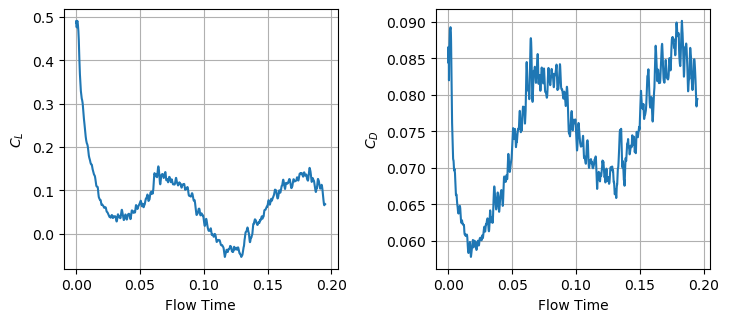

In [7]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,4)
fig.tight_layout(pad=4.0)

ax[0].plot(udf['"Cur_Time"'],udf['"CL"'])
ax[1].plot(udf['"Cur_Time"'],udf['"CD"'])

ax[1].grid()
ax[0].grid()
#ax[0].set_ylim([0.4,0.6])
#ax[0].set_xlim([0,225000])
#ax[1].set_xlim([0,225000])
#ax[1].set_ylim([0.07,0.1])

ax[0].set_xlabel('Flow Time')
ax[1].set_xlabel('Flow Time')
ax[1].set_ylabel('$C_D$')
ax[0].set_ylabel('$C_L$')

## Harmonic balance case

In [8]:
## Define functions for Einv and interpolation

#  Einv calculation
def get_Einv(T,N,K,omegas):
    Einv = np.zeros((N,K),dtype=complex)
    for n in range(0,N):
        for k in range(0,K):
            Einv[n,k] = complex(np.cos(omegas[k]*n*T/N),np.sin(omegas[k]*n*T/N))
    return Einv

#  Interpolation
def get_interp(T,times,omegas,hb_lift):
    Einv = get_Einv(T,len(omegas),len(omegas),omegas)
    coeffs = np.squeeze(np.asarray(np.mat(np.linalg.inv(Einv))*np.mat(hb_lift).transpose()))
    interpol = np.zeros(len(times),dtype=complex)
    for i in range(0,len(times)):
        for k in range(0,len(coeffs)):
            interpol[i] = interpol[i] + coeffs[k]*complex(np.cos(omegas[k]*times[i]),np.sin(omegas[k]*times[i]))
    return interpol

In [9]:
hdf = pd.read_csv('HB/HB_output.csv',index_col=False).rename(columns=lambda x: x.strip())
hdf

/tmp/ipykernel_3803248/4053157518.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  hdf = pd.read_csv('HB/HB_output.csv',index_col=False).rename(columns=lambda x: x.strip())


,time_instance,CL,CD,CMx,CMy,CMz
0,0,0.519114,0.089058,0.486174,-0.231418,-0.037954
1,1,0.562048,0.097191,0.538355,-0.237974,-0.042797
2,2,0.474413,0.076521,0.452587,-0.223498,-0.030153
3,3,0.518803,0.090719,0.493444,-0.222120,-0.040683
4,4,0.555984,0.095062,0.530159,-0.238256,-0.041329


In [10]:
## Number of time points to interpolate
T = 0.32699999999893814
omegas = [0,62.831853072,70.84,-70.84,-62.831853072]
n_times = 10000

times = np.linspace(0,0.5,num=n_times)

## Get interpolated values
hblift = get_interp(T,times,omegas,hdf["CL"].to_numpy())
hbdrag = get_interp(T,times,omegas,hdf['CD'].to_numpy())
hbmoment = get_interp(T,times,omegas,hdf['CMz'].to_numpy())

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(62.597222222222214, 0.5, '$C_L$')

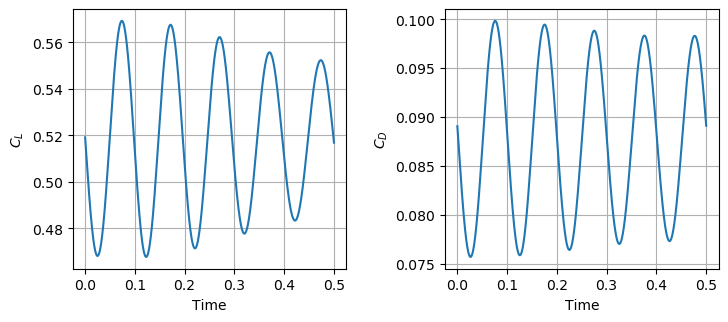

In [11]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(8,4)
fig.tight_layout(pad=4.0)

ax[0].plot(times,hblift)
ax[1].plot(times,hbdrag)

ax[1].grid()
ax[0].grid()
#ax[0].set_ylim([0.4,0.6])
#ax[0].set_xlim([0,225000])
#ax[1].set_xlim([0,225000])
#ax[1].set_ylim([0.07,0.1])

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('$C_D$')
ax[0].set_ylabel('$C_L$')